In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/games.csv")

In [3]:
# Get a first glance at the columns
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
# Remove irrelevant (for my purposes) features
df.drop(["id", "rated", "white_id", "black_id"], axis=1, inplace=True)
df.info()

# ???: I think "opening_name" could also be removed, i could just look the name up when needed from eco-table.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      20058 non-null  float64
 1   last_move_at    20058 non-null  float64
 2   turns           20058 non-null  int64  
 3   victory_status  20058 non-null  object 
 4   winner          20058 non-null  object 
 5   increment_code  20058 non-null  object 
 6   white_rating    20058 non-null  int64  
 7   black_rating    20058 non-null  int64  
 8   moves           20058 non-null  object 
 9   opening_eco     20058 non-null  object 
 10  opening_name    20058 non-null  object 
 11  opening_ply     20058 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.8+ MB


In [5]:
# Check for missing values (we know there aren't any)
# df.isnull().sum()

# If there was any missing data, implement strategy for nans (removing, filling,...)
# that makes sense on the data set

In [ ]:
# Some dtype object data can be converted
le = LabelEncoder()
df["winner"] = le.fit_transform(df["winner"])  # 0 black, 1 draw, 2 white
df.head()

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,1.504210e+12,1.504210e+12,13,outoftime,2,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,1.504130e+12,1.504130e+12,16,resign,0,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,1.504130e+12,1.504130e+12,61,mate,2,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,1.504110e+12,1.504110e+12,61,mate,2,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,1.504030e+12,1.504030e+12,95,mate,2,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [9]:
# === Winrates by openings ===

# Get all wins
wins_df = df[df['winner'] != 'draw']

# Count wins by opening (Openings are the "bins")
opening_wins = wins_df['opening_name'].value_counts()

print("Top 10 openings by wins:")
print(opening_wins.head(10))


Top 10 openings by wins:
opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64


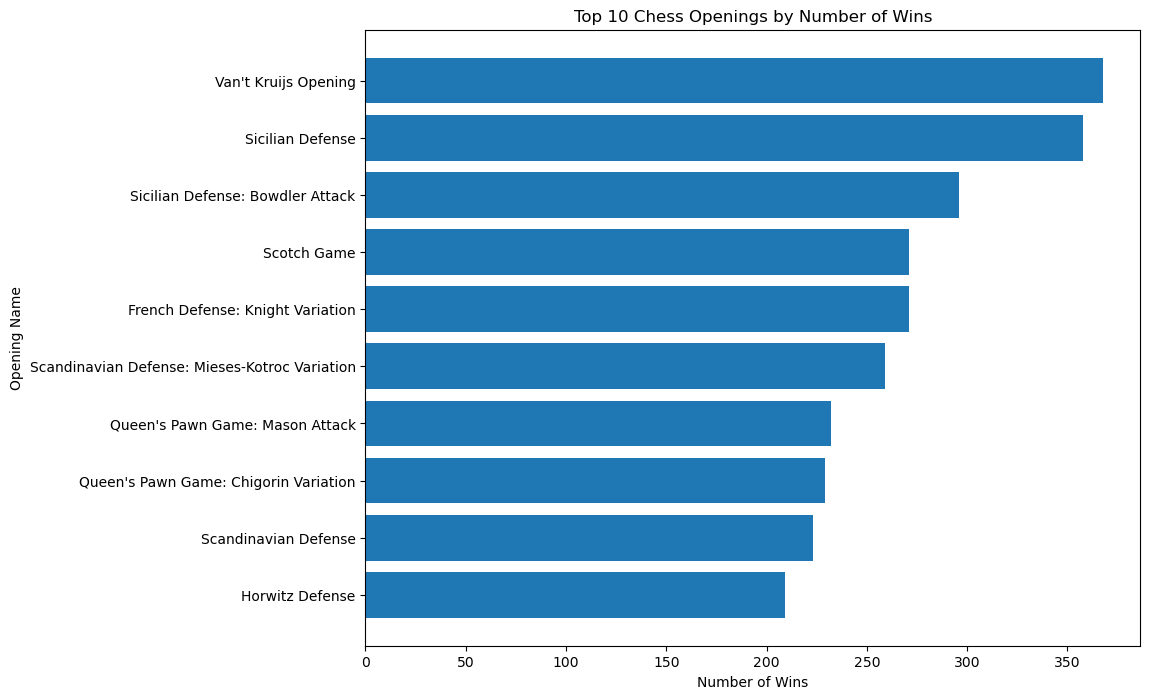

In [ ]:
# Plot the top N openings (horizontal histogram)
top_n = 10
top_openings = opening_wins.head(top_n)

plt.figure(figsize=(10, 8))
bars = plt.barh(top_openings.index, top_openings.values)
plt.xlabel('Number of Wins')
plt.ylabel('Opening Name')
plt.title(f'Top {top_n} Chess Openings by Number of Wins')
plt.gca().invert_yaxis()  # Basically Decreasing order (most to fewest from top to bottom)
plt.show()